# Full Dirichlet VPINN example

In [26]:
from mesh import *

from VPINN_tri_final import *

from PROBDEF import PROBDEF

import os; os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import logging; logging.getLogger('tensorflow').setLevel(logging.ERROR)

tfk = tf.keras
tfkl = tf.keras.layers

import gmsh_worker as gw
from MeshLib import MeshLib as ml

# importing probdef 
pb = PROBDEF()

### Initialise mesh

In [27]:
# seed for reproducibility
initializer = tf.keras.initializers.GlorotUniform(seed=1000)

# mesh init
domain = ((0, 0), (1, 0), (1, 1), (0, 1))

geo_file = './unit_square_triangles'
worker = gw.gmsh_worker(geo_file)

worker.construct_base_geo('./geo_core.txt', 0.5, 2, 2)
worker.generate_parallel_chain(False, False, False)

mesh, _ = ml.take_parallel_mesh_chain(worker.chain[1],worker.chain[3], 'DDDD')

In [28]:
def plot_BC(u_exact, u_NN_BC_):
    """both numpy functions"""
    x = np.linspace(0, 1, 200, dtype=np.float64)

    eval_exact = [u_exact(x[i], 1.0) for i in range(len(x))]

    eval_net = [u_NN_BC_(x[i], 1.0) for i in range(len(x))]

    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    plt.figure(figsize=(10,7))  # Set the figure size

    # Plot the data
    plt.subplot(221)   
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("top edge")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.0) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.0) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(223)    
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("bottom edge")
    plt.legend()

    eval_exact = [u_exact(1.0, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(1.0, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(222)    
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("right edge")
    plt.legend()

    eval_exact = [u_exact(0.0, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(0.0, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(224)   
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("left edge")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.5) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.5) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    plt.figure(figsize=(10, 7))  # Set the figure size

    # Plot the data
    plt.subplot(221)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle y=0.5")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.25) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.25) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(222)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle y=0.25")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.75) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.75) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(223)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle y=0.75")
    plt.legend()

    eval_exact = [u_exact(0.5, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(0.5, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(224)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle x=0.50")
    plt.legend()

def helper_colour_plot(x, y, model):

    x_=tf.reshape(x,(-1,1))
    y_=tf.reshape(y,(-1,1))

    eval=tf.concat([x_,y_],axis=1)

    return tf.reshape(model(eval),(tf.shape(x)[0],-1))

def color_plot(model):

    x = np.linspace(0, 1, 1000)
    y = np.linspace(0, 1, 1000)

    X, Y = np.meshgrid(x, y)

    ######## EXACT ###########

    exact = pb.u_exact_np(X,Y)
    fig=plt.imshow(
        exact,
        extent=[min(x), max(x), min(y), max(y)],
        vmin=np.min(exact),
        vmax=np.max(exact)
    )

    plt.title('Exact')
    plt.colorbar(fig)

    fig.axes.set_autoscale_on(False)
    plt.show()

    ######## PREDICTION ############

    pred = helper_colour_plot(X,Y,model)
    fig=plt.imshow(
        exact,
        extent=[min(x), max(x), min(y), max(y)],
        vmin=np.min(pred),
        vmax=np.max(pred)
    )

    plt.title('Prediction')
    plt.colorbar(fig)

    fig.axes.set_autoscale_on(False)
    plt.show()

    ######## ABS. ERROR ############

    error = np.abs(exact - pred)

    fig=plt.imshow(
        error,
        extent=[min(x), max(x), min(y), max(y)],
        vmin=np.min(error),
        vmax=np.max(error)
    )

    plt.title('Absolute error')
    plt.colorbar(fig)

    fig.axes.set_autoscale_on(False)
    plt.show()

    ######## REL. ERROR ############

    # error /= np.max(error)
    error /= np.max(exact)


    fig=plt.imshow(
        error,
        extent=[min(x), max(x), min(y), max(y)],
        vmin=np.min(error),
        vmax=np.max(error)
    )

    plt.title('Relative error')
    plt.colorbar(fig)

    fig.axes.set_autoscale_on(False)
    plt.show()

### Train boundary condition network

In [29]:
#net used for approximating the fully dirichlet bc  
bc_model = tfk.models.Sequential()
bc_model.add(tf.keras.Input(shape=(2,),dtype=tf_type))
bc_model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
bc_model.add(tfkl.Dense (10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
bc_model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
bc_model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
bc_model.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))

print(bc_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                30        
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
# setting model to the current net
model = bc_model

# helper function to treat the net as a lamda function
def model_np(x, y):
    eval = tf.constant([[x, y]], dtype=tf.float64)
    return model(eval).numpy()[0, 0]

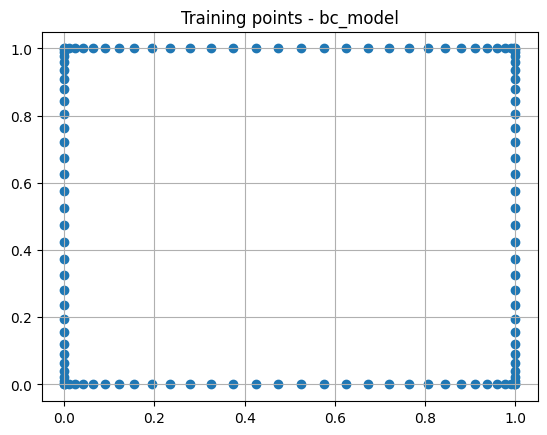

In [31]:
# Generate training data for the network
x = pb.generate_boundary_points(30, False)
plt.scatter(x[:, 0], x[:, 1])
plt.title("Training points - bc_model")
plt.grid()

y = pb.u_exact(x[:, 0], x[:, 1])
y = tf.reshape(y, (-1, 1))

In [32]:
# Training process of bc_model with the MSE as loss function 
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adjust the learning rate as needed
bc_model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

history=model.fit(x, y, epochs=3000, batch_size=np.size(y))

Epoch 1/3000


1/1 [==============================] - 1s 819ms/step - loss: 1.4395
Epoch 2/3000
1/1 [==============================] - 0s 5ms/step - loss: 1.3786
Epoch 3/3000
1/1 [==============================] - 0s 5ms/step - loss: 1.3195
Epoch 4/3000
1/1 [==============================] - 0s 5ms/step - loss: 1.2622
Epoch 5/3000
1/1 [==============================] - 0s 6ms/step - loss: 1.2069
Epoch 6/3000
1/1 [==============================] - 0s 5ms/step - loss: 1.1536
Epoch 7/3000
1/1 [==============================] - 0s 5ms/step - loss: 1.1024
Epoch 8/3000
1/1 [==============================] - 0s 8ms/step - loss: 1.0534
Epoch 9/3000
1/1 [==============================] - 0s 6ms/step - loss: 1.0064
Epoch 10/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.9617
Epoch 11/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.9192
Epoch 12/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.8790
Epoch 13/3000
1/1 [==============================] - 0s 5ms/

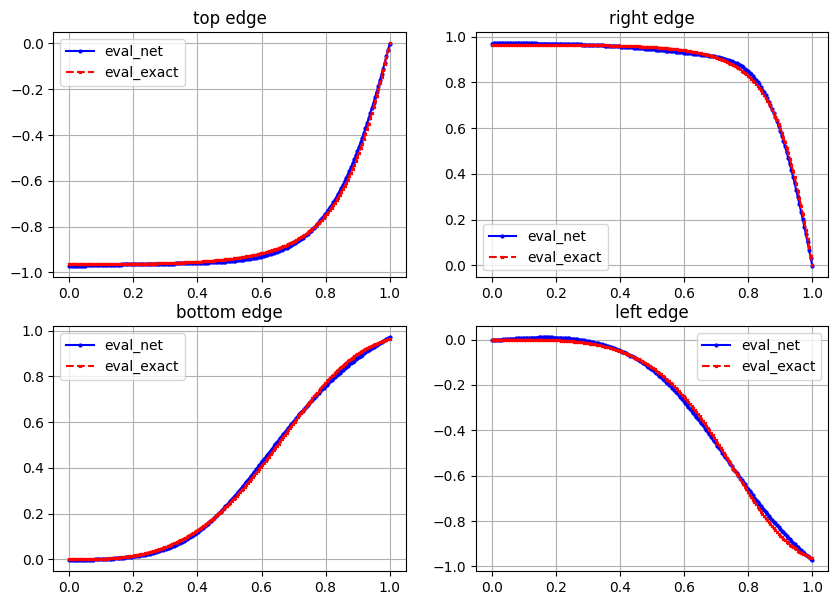

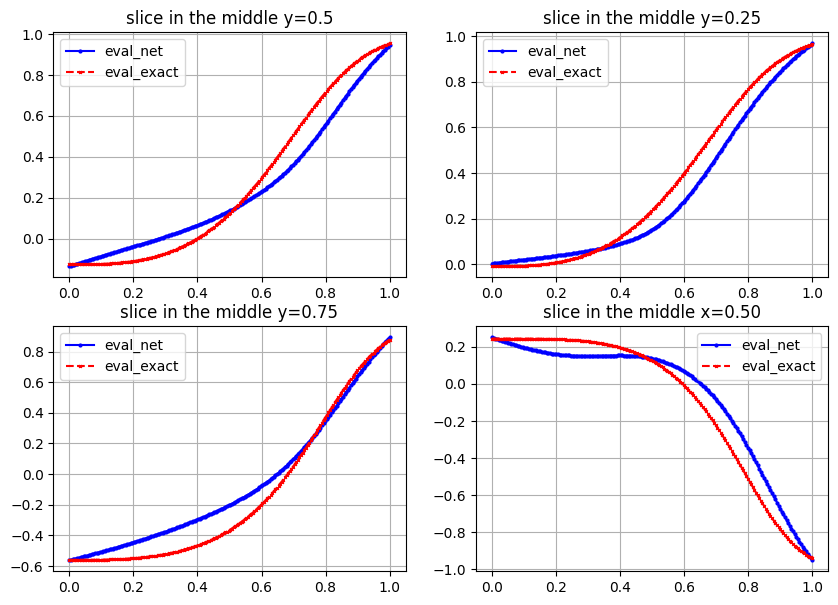

In [33]:
# Compare with the now trained network
plot_BC(pb.u_exact_np,model_np)

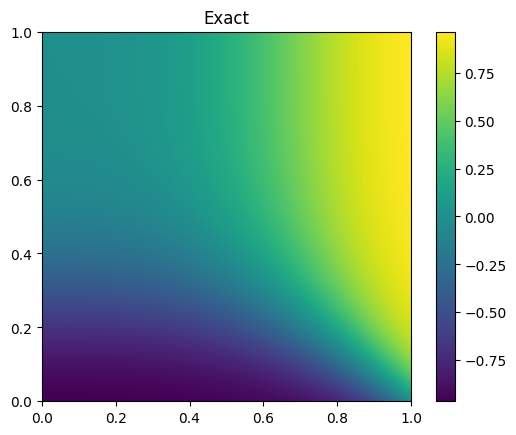

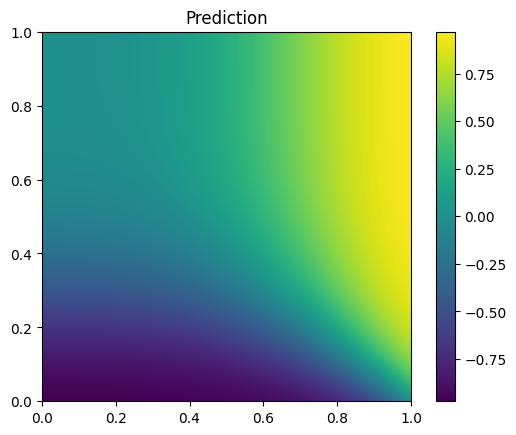

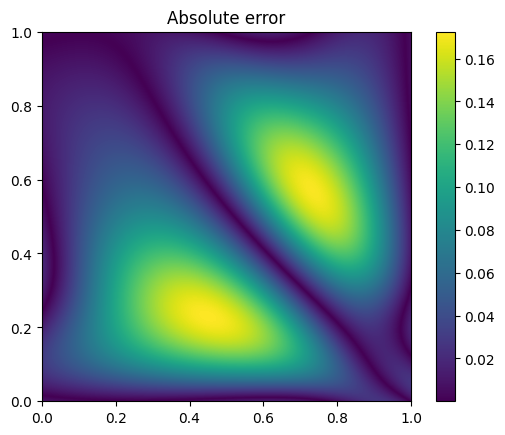

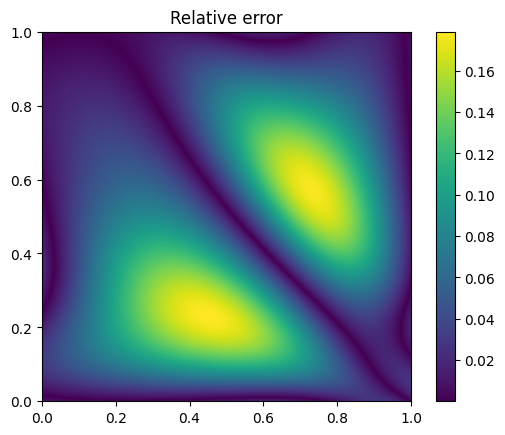

In [34]:
color_plot(bc_model)

In [35]:
# Make the bc_model non-trianable
for layer in bc_model.layers:
    layer.trainable = False

# Display model summary after making weights non-trainable
bc_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                30        
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 0
Non-trainable params: 371
_________________________________________________________________


###  VPINN MODEL

In [36]:
# Create the network to be trained on the variational form
MODEL = tfk.models.Sequential()
MODEL.add(tf.keras.Input(shape=(2,),dtype=tf_type))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))

MODEL.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 50)                150       
                                                                 
 dense_15 (Dense)            (None, 50)                2550      
                                                                 
 dense_16 (Dense)            (None, 50)                2550      
                                                                 
 dense_17 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________


#### Problem parameters

In [37]:
# order of test function 
N_test = 1
params = {'scheme': 'VPINNs','N_test':N_test}

In [38]:
mesh = mesh.convert_to_dict()

In [39]:
# Initialise VPINN class
vp=VPINN(pb,params,mesh,False,NN=MODEL)
model=vp.u_NN_BC


-->mesh : 
     n_triangles :  16
     n_vertices  :  13
     n_edges     :  28
     h_max           :  0.5000000000013305
     h_min           :  0.353553390592333
-->test_fun      : 
     order       :  1
     dof         :  5


In [40]:
# vp.set_bc_model(vp.standard_bc)  # Normal imposition of BCs
vp.set_bc_model(bc_model)        # NN imposition of BCs

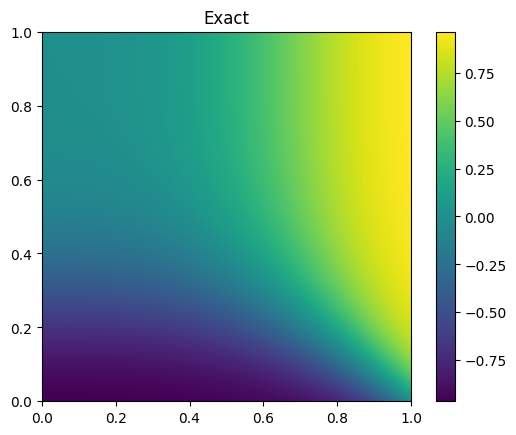

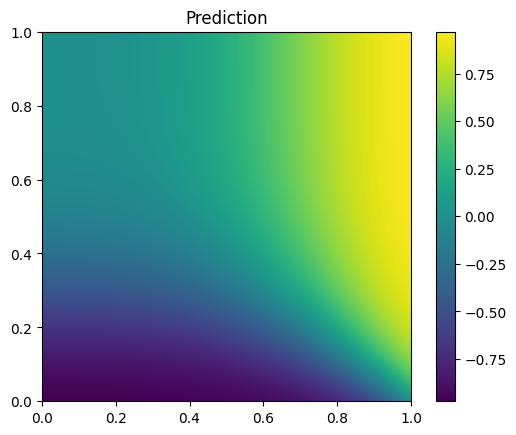

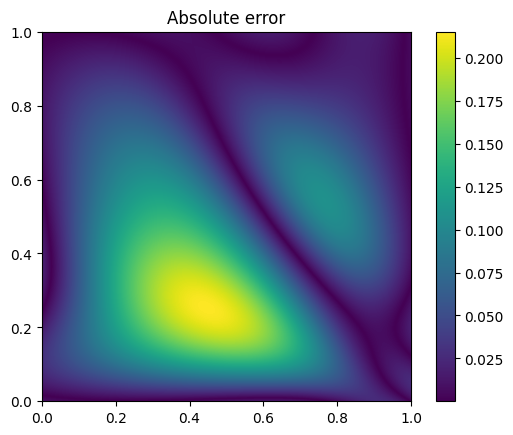

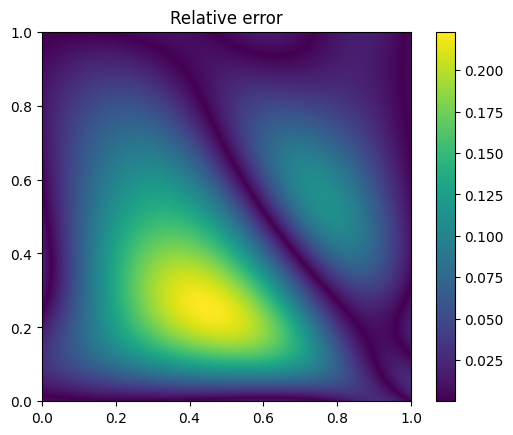

In [41]:
color_plot(vp.NN_imposeBC)

In [42]:
# Start training
history=vp.train(1000,0.001)

2023-12-26 12:44:25.806804: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-12-26 12:44:25.809665: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.0758728564 time: 3.639747142791748
Iteration: 10 loss: 0.0168988868 time: 0.046391963958740234
Iteration: 20 loss: 0.0045865888 time: 0.04802823066711426
Iteration: 30 loss: 0.0011912628 time: 0.04842972755432129
Iteration: 40 loss: 0.0003854311 time: 0.04837608337402344
Iteration: 50 loss: 0.0003149814 time: 0.052356719970703125
Iteration: 60 loss: 0.0001057566 time: 0.04981231689453125
Iteration: 70 loss: 0.0000435995 time: 0.05107474327087402
Iteration: 80 loss: 0.0000403929 time: 0.048854827880859375
Iteration: 90 loss: 0.0000302712 time: 0.04794192314147949
Iteration: 100 loss: 0.0000279465 time: 0.04895353317260742
Iteration: 110 loss: 0.0000273581 time: 0.041136741638183594
Iteration: 120 loss: 0.0000265837 time: 0.03556370735168457
Iteration: 130 loss: 0.0000263384 time: 0.03618502616882324
Iteration: 140 loss: 0.0000260685 time: 0.03746533393859863
Iteration: 150 loss: 0.0000258308 time: 0.03565573692321777
Iteration: 160 loss: 0.0000255908 time: 0.0371623

## Analysis

### Loss

In [43]:
def plot_loss(history):  
    iterations = range(0, len(history) * 10, 10)  # Assuming losses are provided every 10 iterations

    plt.figure(figsize=(10, 10))

    plt.subplot(211)
    plt.plot(iterations, history, marker='*',color='green',linewidth=1)
    plt.title('Loss Function Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid()

    plt.subplot(212)
    plt.semilogy(iterations, history,linewidth=1)
    plt.title('Loss Function Over Iterations (semilog scale)')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid()

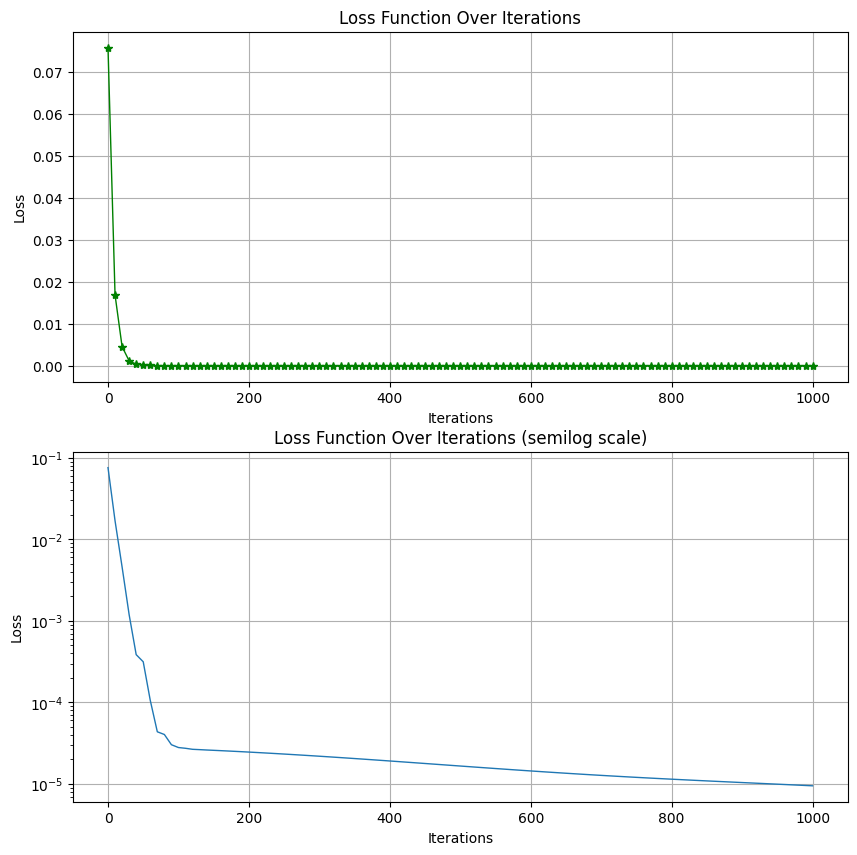

In [44]:
plot_loss(history)

### Prediction

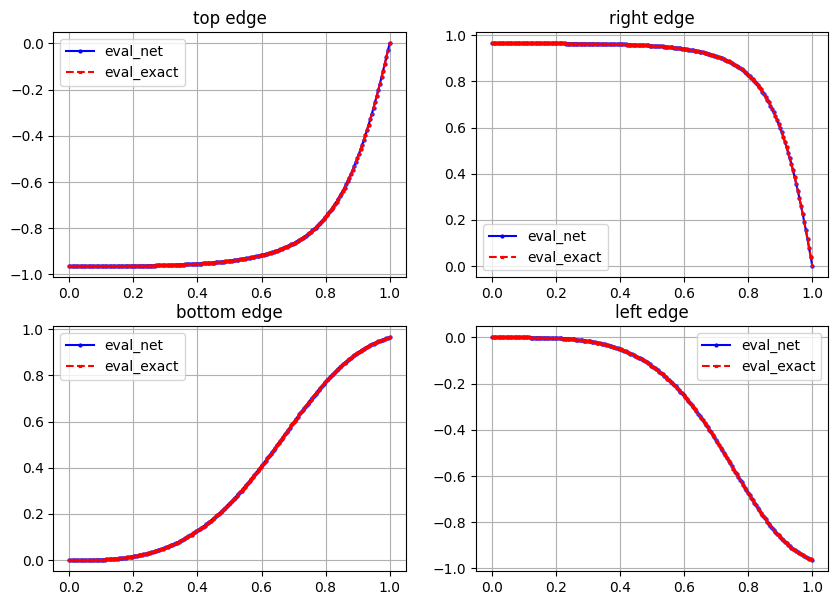

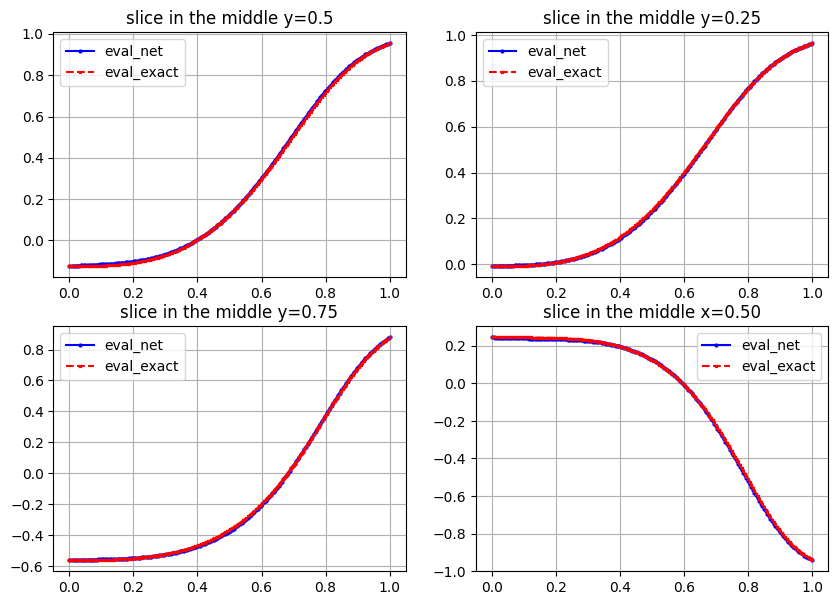

In [45]:
plot_BC(pb.u_exact_np,vp.u_NN_BC)

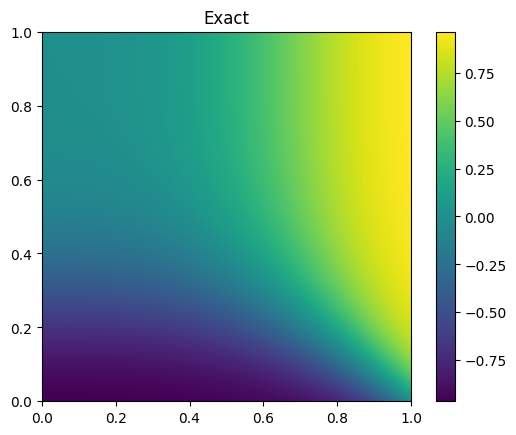

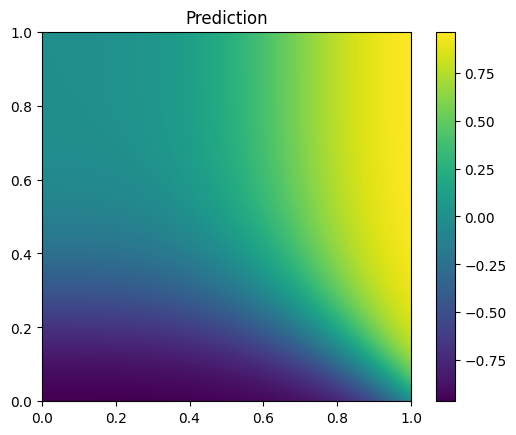

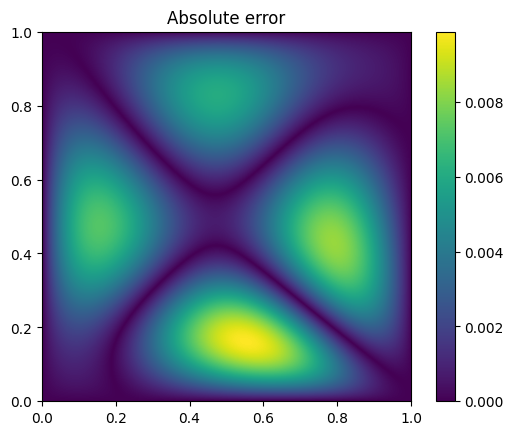

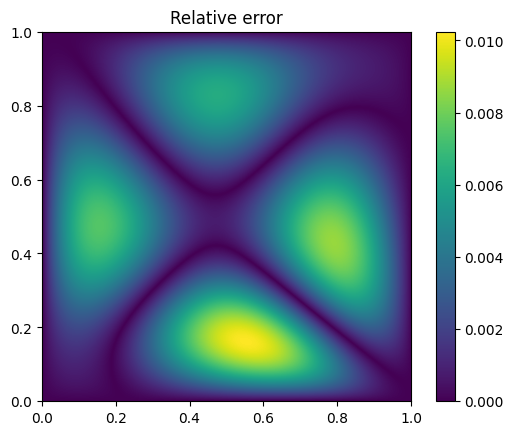

In [46]:
color_plot(vp.NN_imposeBC)

### Residuals

In [47]:
# Find the residuals over vertices and edges
if N_test == 1:
    residual_ending_vertices = vp.calc_residuals()   # r = 1 case
    vp.residual_summary(residual_ending_vertices)   # r = 1 case
elif N_test == 2:
    residual_ending_vertices, residual_ending_edges = vp.calc_residuals()  # r = 2
    vp.residual_summary(residual_ending_vertices,residual_ending_edges)  # r = 2


residual of vertices : 
-->max  =  3.276096773092442e-05
-->min  =  3.3322833423665415e-08
-->mean =  9.470421590587531e-06


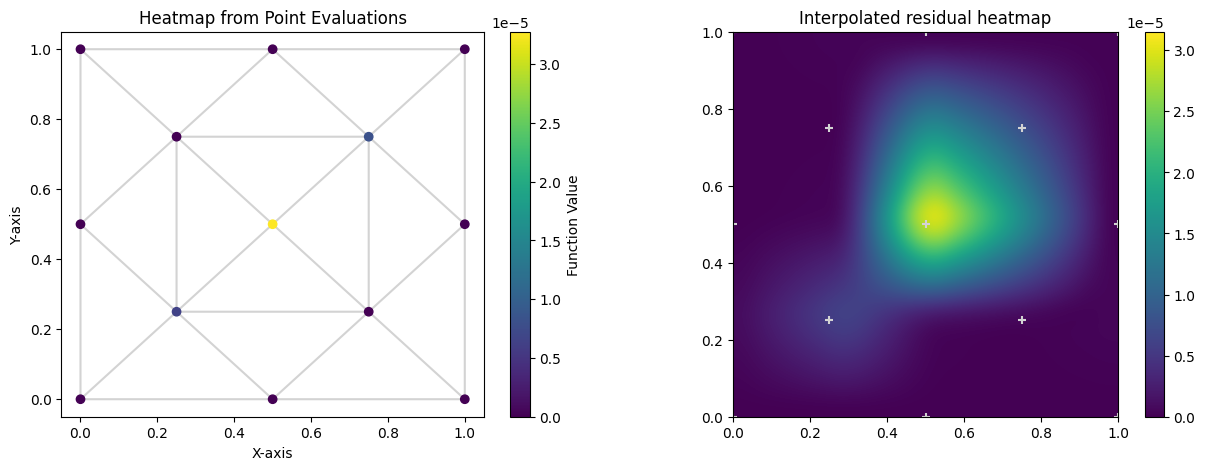

In [48]:
def plot_residuals():
    x = vp.mesh['vertices'][:,0]
    y = vp.mesh['vertices'][:,1]

    plt.figure(figsize=(15, 5))

    plt.subplot(121)
    plt.triplot(
        x,
        y, color='lightgrey'
    )
    scatter = plt.scatter(x, y, c=residual_ending_vertices, cmap='viridis', marker='o')

    plt.colorbar(scatter, label='Function Value')
    plt.title('Heatmap from Point Evaluations')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')

    import scipy.interpolate as sp

    f = sp.interp2d(x, y, residual_ending_vertices, kind="linear")

    # from pylab import figure, cm
    from matplotlib.colors import LogNorm

    x_coords = np.linspace(0, 1, 20)
    z_coords = np.linspace(0, 1, 20)
    c_i = np.abs(f(x_coords, z_coords))

    plt.subplot(122)
    fig = plt.imshow(
        c_i,
        extent=[min(x), max(x), min(y), max(y)],
        origin="lower",
        interpolation="bicubic",
        # norm=LogNorm(vmin = np.min(c_i), vmax=np.max(c_i))
    )
    plt.title('Interpolated residual heatmap')
    plt.scatter(x, y, color='lightgrey', marker='+')
    plt.colorbar(fig)

plot_residuals()

### H1 and L2 error

In [49]:
# Get quad pairs
from numpy.polynomial import legendre

def get_quad_rule(n: int):
    # Degree of the Legendre polynomial (number of nodes - 1)

    # Nodes and weights for Gauss-Legendre quadrature
    nodes, weights = legendre.leggauss(n + 1)



    nodes=(nodes+1.0)/2.0


    # Nodes=np.array([nodes],dtype=np_type)

    Weights=np.array([weights],dtype=np_type)
    w = Weights.T @ Weights
    w = np.reshape(w, (-1,1))


    x, y =np.meshgrid(nodes,nodes)


    x = x.flatten()
    y = y.flatten()
 



    xy=np.array([x,y]).T


    return xy, w/4

def L2_error(xy, w):
    
    u_NN = vp.NN_imposeBC(xy)

    # Find the exact solution
    u_ex = pb.u_exact_np(xy[:,0], xy[:,1])
    u_ex = np.reshape(u_ex, (-1,1))

    integrand = (u_ex - u_NN)**2


    # Find the difference between exact and NN 
    # return (u_ex - u_NN)**2

    return np.sqrt(np.sum(w*integrand))

def semi_H1_error(xy, w):

    # Find the gradient of the exact solution
    grad_ex = np.array([pb.dudx(xy[:,0], xy[:,1]), pb.dudy(xy[:,0], xy[:,1])],dtype=np_type).T


    # Find the gradient of the NN solution
    grad_NN = vp.eval_grad_NN_BC(tf.constant(xy, dtype=tf_type))

    


    # Find the difference between exact and NN 
    pw_diff = grad_ex - grad_NN

    pw_diff = tf.reduce_sum(tf.square(pw_diff),axis=1)

    pw_diff=tf.reshape(pw_diff,(-1,1))


    return np.sqrt(np.sum(pw_diff*w))

In [50]:
#set quad rule for calc errors
xy, w = get_quad_rule(70)

semi_H1_err = semi_H1_error(xy, w)
L2_error_ = L2_error(xy, w)
H1_err = np.sqrt(L2_error_**2 + semi_H1_err**2)

print(f"L2 error: {L2_error_}")
print(f"semi H1 error: {semi_H1_err}")
print(f"H1 error: {H1_err}")

L2 error: 0.003806761740456337
semi H1 error: 0.039633030815451144
H1 error: 0.03981543126185
